
# Clustering Project

## This algorithm is aimed to use K-means in order to divide students in a dormitory base on their similarities in cultures, personalities, and habits.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [2]:
sample = pd.read_csv("file:///C:/Users/Ali%20Fard/Desktop/clustering%20project/Clustering-Project_BNUT/sample1.csv")
# take a look at the dataset
sample.head()

,student code,city,personality,day/ night person,smoke
0,1,10,11,2,1
1,2,13,1,2,1
2,3,27,2,1,2
3,4,27,5,1,2
4,5,11,11,1,2


In [3]:
sample1=sample.drop(['day/ night person','student code','smoke'],axis=1)

sample1.head()

,city,personality
0,10,11
1,13,1
2,27,2
3,27,5
4,11,11


In [4]:
from sklearn.preprocessing import StandardScaler
X=sample1
X = sample1.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.58766725,  0.65595497],
       [-0.2350669 , -1.65708698],
       [ 1.41040139, -1.42578278],
       [ 1.41040139, -0.7318702 ],
       [-0.4701338 ,  0.65595497],
       [ 1.17533449, -0.96317439],
       [-0.2350669 ,  0.88725917],
       [ 0.        , -0.03795761],
       [ 0.4701338 ,  0.88725917],
       [-0.2350669 , -0.7318702 ],
       [-0.94026759, -0.500566  ],
       [-0.11753345,  0.65595497],
       [ 1.52793484, -0.500566  ],
       [ 1.41040139, -0.7318702 ],
       [ 1.05780104, -0.03795761],
       [-0.35260035,  1.58117176],
       [-0.82273414, -0.96317439],
       [ 1.29286794,  0.65595497],
       [ 0.        , -0.7318702 ],
       [-0.2350669 ,  0.65595497],
       [-1.05780104,  0.88725917],
       [-0.82273414,  0.42465078],
       [-1.41040139, -0.7318702 ],
       [ 1.17533449, -0.7318702 ],
       [ 0.4701338 , -1.19447859],
       [-1.29286794, -1.19447859],
       [ 0.94026759, -0.96317439],
       [-0.58766725,  1.58117176],
       [ 0.11753345,

In [5]:
clusterNum = 7
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[1 4 0 0 1 0 1 1 6 4 3 1 0 0 0 5 3 2 4 1 5 1 3 0 4 3 0 5 4 4 1 1 0 6 1 2 4
 3 6 6 6 1 3 5 2 4 0 0 5 3 0 4 4 6 1 0 6 0 5 0 2 3 0 6 1 3 3 1 0 5 5 6 3 5
 6 4 3 5 3 1 2 0 1 1 6 2 0 5 4 1 3 2 3 4 1 3 5 4 0 4 5 3 6 6 6 6 5 2 1 6 1
 2 3 0 4 3 0 0 5 1 3 0 1 1 1 3 2 1 0 3 2 3 5 1 4 0 3 3 2 1 3 5 1 3 5 0 3 5
 3 4 4 0 5 1 1 6 0 6 5 3 4 4 1 4 5 5 1 3 0 6 6 6 4 0 6 0 1 4 1 1 5 0 2 1 1
 4 0 1 6 5 6 6 1 0 1]


In [6]:
sample1["Clus_km"] = labels
sample1.head(10)

,city,personality,Clus_km
0,10,11,1
1,13,1,4
2,27,2,0
3,27,5,0
4,11,11,1
5,25,4,0
6,13,12,1
7,15,8,1
8,19,12,6
9,13,5,4


In [20]:
sample1.groupby('Clus_km').mean()

,city,personality
Clus_km,,
0,25.514286,4.942857
1,9.439024,9.536585
2,28.615385,12.384615
3,6.129032,4.064516
4,15.920000,3.120000
5,6.960000,13.760000
6,20.440000,12.760000


In [19]:
sample_list=sample1.values.tolist()


In [8]:
c0=[]
for i in range (195):
    if sample_list[i][2]==0:
        c0.append(sample_list[i])

df = pd.DataFrame(c0)
writer = pd.ExcelWriter('test0.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='c0', index=False)
writer.save()
writer.close()

C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


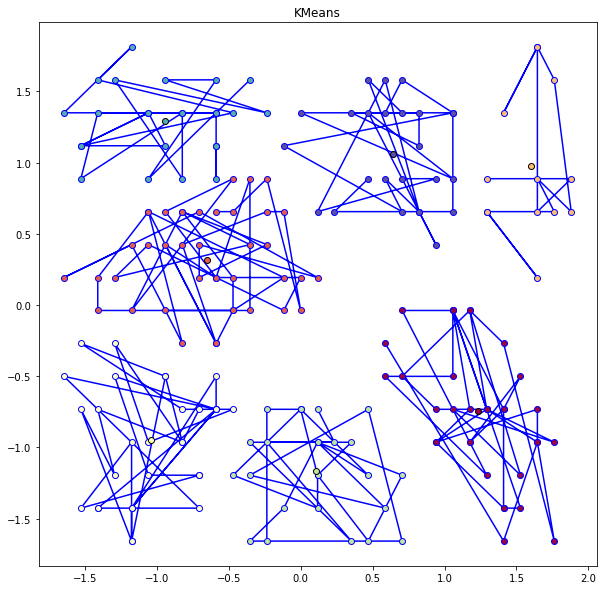

In [26]:
k_means_labels=labels
k_means_cluster_centers = k_means.cluster_centers_

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(10, 10))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_cluster_centers)), colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    #print(my_members)
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'b', markerfacecolor=col, marker='o')
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
#ax.set_xticks(())

# Remove y-axis ticks
#ax.set_yticks(())

# Show the plot
plt.show()
